# 2022年7月3日14:58:38

# 勒让德-高斯积分

计算公式为：
$$\int^b_a f(x)dx=\frac{b-a}{2}\int^1_{-1}f(\frac{a+b}{2}+\frac{b-a}{2}\eta)d\eta=\frac{b-a}{2}\sum^n_{i=0}w_i f(\frac{a+b}{2}+\frac{b-a}{2}\eta_i)$$
其中$w_i$和$\eta_i$可以查表获得

In [1]:
import numpy as np
from numpy.polynomial.legendre import leggauss # 这里的功能相当于查表获得w_i和eta_i

假设有一个element，其两个node分别为$x_i$和$x_{i+1}$，则其形函数可以写作：
$$f1(x)=\frac{x-x_{i+1}}{x_i-x_{i+1}}$$
和
$$f2(x)=\frac{x-x_i}{x_{i+1}-x_i}$$

In [2]:
# 定义函数
# 假设a=0,b=0.2
a=-1
b=1
def f1(x,a=a,b=b): # 其中a=x_i,b=x_(i+1),且a<b
    return (x-b)/(a-b)

def f2(x,a=a,b=b):
    return (x-a)/(b-a)

In [3]:
# 定义勒让德-高斯积分
def gauss_leg_quad(f,n,aa,bb): #这里的aa,bb是任意区间[aa,bb]的意思,aa<bb
    x,w=leggauss(n)
    summ=0
    for i in range(len(x)):
        summ+=w[i]*f((aa+bb)/2+(bb-aa)/2*x[i])
    return (bb-aa)/2*summ

In [4]:
gauss_leg_quad(f1,3,a,b)

1.0

In [5]:
gauss_leg_quad(f2,3,a,b)

1.0000000000000002

In [6]:
ff=lambda x:f1(x)*f2(x)
gauss_leg_quad(ff,3,a,b)

0.33333333333333337

In [7]:
# 定义区间在[-1.1]之间的形函数
def ff1(x):
    return (x-1)/(-1-1)

def ff2(x):
    return (x+1)/(1+1)

In [8]:
# 对于定义域本身就在[-1,1]之间的函数
def gauss_leg_quad2(f,n):
    x,w=leggauss(n)
    summ=0
    for i in range(len(x)):
        summ+=w[i]*f(x[i])
    return summ

In [9]:
gauss_leg_quad2(ff1,3)

1.0

In [20]:
a=2
b=2.2
f11=lambda x:f1(x,a,b)
gauss_leg_quad(f11,3,a,b)

0.10000000000000009

In [11]:
(b-a)/2*gauss_leg_quad2(ff1,3)

0.1

In [24]:
a=10
b=10.2
f11=lambda x:f1(x,a,b)
f22=lambda x:f2(x,a,b)
f1_f2=lambda x:f11(x)*f22(x)
ff1_ff2=lambda x:ff1(x)*ff2(x)

gauss_leg_quad(f1_f2,3,a,b),(b-a)/2*gauss_leg_quad2(ff1_ff2,3)

(0.0333333333333336, 0.03333333333333322)

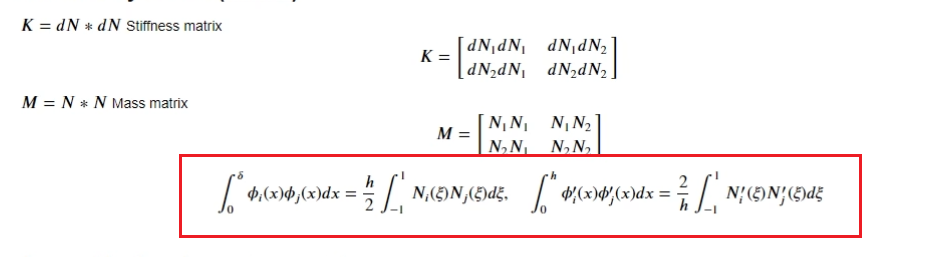

通过程序证明了左上式是正确的。

In [13]:
# 定义形函数的导数
def df1(x,a,b):
    return 1/(a-b)

def df2(x,a,b):
    return 1/(b-a)

In [14]:
# 定义区间在[-1,1]之间的形函数的导数
def dff1(x):
    return -1/2

def dff2(x):
    return 1/2


In [28]:
a,b=0,0.0125
df11=lambda x:df1(x,a,b)
df22=lambda x:df2(x,a,b)
df1_df2=lambda x:df11(x)*df22(x)
dff1_dff2=lambda x:dff1(x)*dff2(x)

gauss_leg_quad(df1_df2,3,a,b),2/(b-a)*gauss_leg_quad2(dff1_dff2,3)

(-80.00000000000001, -80.00000000000001)

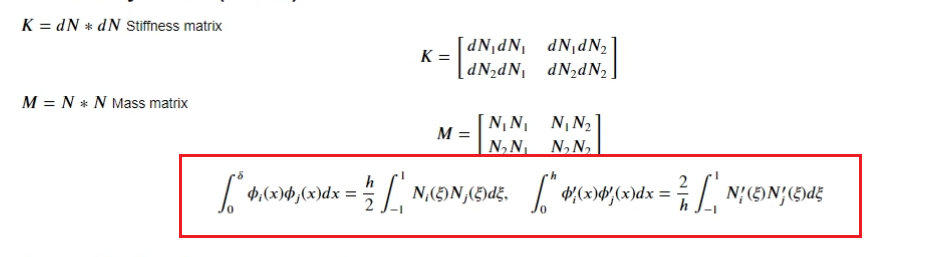

通过程序证明了右上式是正确的

**通过自己的经验，还是使用直接定义的好，没有必要转换到[-1,1]之间**